# Project: We Rate Dogs : Wrangling and Analyze Data

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import io
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
r.status_code

200

In [4]:
Data = r.content
image_pred = pd.read_csv(io.StringIO(Data.decode('utf-8')), sep='\t')
image_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
data = [json.loads(line) for line in open('tweet-json.txt','r')]

In [6]:
df_api = pd.DataFrame(data)
df_api.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data



### archive Dataframe Assessment

In [7]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

>Improper data types for certain columns e.g timestamp, object datatype not datetime

In [8]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


>Numerator and Denominator appear to have extreme max values

In [9]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1707,680801747103793152,NaN,NaN,2015-12-26 17:25:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Great picture here. Dog on the right panicked ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680801747...,10,10,None,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
1972,673240798075449344,NaN,NaN,2015-12-05 20:41:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673240798...,6,10,None,None,None,None,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,None,None,None,None
1020,746757706116112384,NaN,NaN,2016-06-25 17:31:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maddie. She gets some wicked air time....,NaN,NaN,NaN,https://vine.co/v/5BYq6hmrEI3,11,10,Maddie,None,None,None,None



<ul>
    <li>Certain tweets are not Original tweets but replies and retweets.</li>
    <li>'doggo', 'pupper', 'puppo', 'floofer', columns should have been in one column for tidiness.</li>
    <li>Source column not Human Readable.</li>
    <li>Name column has words that do not appear to be names. The words seem to be in lowercase</li>
</ul>


In [10]:
not_names = archive['name'].str.contains('^[a-z]', regex = True)
print(archive[not_names]['name'].value_counts())
print("Number of words that are not names : " ,len(archive[not_names]['name'].value_counts()))

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64
Number of words that are not names :  25


### image_pred Dataframe Assessment

In [11]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<ul>
<li>Improper datatype for tweet_id</li>
<li>Column names not descriptive</li>
    </ul>

In [12]:
image_pred.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
749,687818504314159109,https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg,1,Lakeland_terrier,0.873029,True,soft-coated_wheaten_terrier,0.060924,True,toy_poodle,0.017031,True
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,Norfolk_terrier,0.129114,True,Pomeranian,0.120822,True
570,678396796259975168,https://pbs.twimg.com/media/CWomSU_XIAAUYiK.jpg,2,Pembroke,0.956180,True,Cardigan,0.031803,True,Chihuahua,0.006276,True


>Inconsistent case format in p1, p2 and p3 columns

### df_api Dataframe Assessment

In [13]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

<ul>
    <li>Wrong datatypes for some columns</li>
    <li>Empty columns e.g geo </li>
    <li>Repetition of columns just in different datatype format</li>
    </ul>
    

In [14]:
df_api.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
756,Wed Sep 21 16:00:17 +0000 2016,778624900596654080,778624900596654080,This is Penny. She's a sailor pup. 11/10 would...,False,"[0, 73]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 778624895001436165, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5177,False,False,False,False,en,NaN,NaN,NaN,NaN
496,Sun Dec 25 22:00:04 +0000 2016,813142292504645637,813142292504645637,Everybody stop what you're doing and look at t...,False,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 813142281943252992, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9361,False,False,False,False,en,NaN,NaN,NaN,NaN
235,Thu Mar 30 00:56:03 +0000 2017,847251039262605312,847251039262605312,This is Furzey. He's doing an elevated sandy z...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 847251028009336833, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,22036,False,False,False,False,en,NaN,NaN,NaN,NaN


<ul>
    <li>Difficult to get meaning out of display_text_range, entities, extended_entities columns</li>
    <li>entities and extended_entities appear to be repititions of each other, and compounded columns carrying information already expressed in other columns such as 'id'</li>
    <li>source column not human readeable</li>
    <li>several columns relating to retweets and not original tweets</li>
    <li>possibly_sensitive and possibly_sensitive_appealable appear to be repetitions</li>
    </ul>

In [15]:
df_api['possibly_sensitive'].equals(df_api['possibly_sensitive_appealable'])

True

### Across all three dataframes

In [16]:
columns = pd.Series(list(archive) + list(df_api) + list(image_pred))
columns[columns.duplicated()]

25                   source
26    in_reply_to_status_id
28      in_reply_to_user_id
48                 tweet_id
dtype: object

>Some columns are repeated across the three data frames

>df_api and image_pred dataframes are missing some data, with 2354 and 2075 respectively. (archive has 2356 entries)

### Quality issues
##### 1. Columns in wrong datatype <br>
    i) Id columns in int or float datatype not string;
<ul>
    <li> tweet_id </li>
    <li> in_reply_to_status_id </li>
    <li> in_reply_to_user_id </li>
    <li> retweeted_status_id </li>
    <li> retweeted_status_user_id </li>
    <li> id </li>
    </ul> <br>
    ii) columns meant to be in datetime datatype in object type,
    <ul>
    <li> timestamp </li>
    <li> retweeted_status_timestamp </li>
    <li> created_at </li>
    </ul>

##### 2. Null values misrepresented as "None" across dataframes.

##### 3. column names not descriptive
<ul>
    <li> jpg_url </li>
    <li> img_num </li>
    <li> p1 </li>
    <li> p1_conf </li>
    <li> p1_dog </li>
    <li> p2 </li>
    <li> p2_conf </li>
    <li> p2_dog </li>
    <li> p3 </li>
    <li> p3_conf </li>
    <li> p3_dog </li>
    </ul>

##### 4. Retweets and replies in dataframes, only need original tweets.

##### 5. source column not human readable.

##### 6. Values in names column (archive dataframe) that are not actual names.

##### 7. Inconsistent case format.
<ul>
    <li> 'p1'</li>
    <li> 'p2'</li>
    <li> 'p3'</li>
    </ul>

##### 8. Outlier values in rating_numerator and denominator columns

### Tidiness issues
##### 1. Repetition of columns
<ul>
    <li>in_reply_to_status_id : in_reply_to_status_id_str </li> 
    <li>in_reply_to_user_id : in_reply_to_user_id_str </li>
    <li>quoted_status_id : quoted_status_id_str </li>
    <li>possibly_sensitive : possibly_sensitive_appealable </li>
</ul><br>
    >>> repitition across all three dataframes
    <ul>
    <li>Source</li> 
    <li>in_reply_to_status_id </li>
    <li>in_reply_to_user_id </li>
    <li>entities and extended_entities are a little more complex with information compounded from other columns </li>
</ul>

##### 2. No observations in geo,coordinates, and contributors columns(df_api dataframe)

##### 3. doggo, floofer, pupper, puppo columns in archive dataframe need to be merged into one column


## Cleaning Data


In [17]:
# Make copies of original pieces of data
archive_copy = archive.copy()
df_api_copy = df_api.copy()
image_pred_copy = image_pred.copy()

>The tidiness issues will be addressed first because the number of columns is large. 

## <font color='Blue'>Tidiness issues</font>

### Issue #1: Repetition of columns

#### Define:
Before merging the 3 dataframes, the repeated columns will be dropped including the columns with no observations. The entities and extended_entities columns from the archive dataframe will be dropped as well because they contain information already present in other columns. Along with these will be columns not used for the analysis.

#### Code

In [18]:
df_api_copy.drop(columns=['geo', 
                     'coordinates', 
                     'contributors', 
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id_str',
                     'quoted_status_id_str',
                     'source',
                     'in_reply_to_status_id',
                     'in_reply_to_user_id',
                     'place',
                     'id_str',
                     'possibly_sensitive_appealable'], inplace=True)

#### Removing columns we wont use for analysis

In [19]:
cols =['truncated','display_text_range','entities','extended_entities','user','is_quote_status','quoted_status_id','quoted_status']
df_api_copy = df_api_copy.drop(columns=cols)

#### Test

In [20]:
df_api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   created_at               2354 non-null   object
 1   id                       2354 non-null   int64 
 2   full_text                2354 non-null   object
 3   in_reply_to_screen_name  78 non-null     object
 4   retweet_count            2354 non-null   int64 
 5   favorite_count           2354 non-null   int64 
 6   favorited                2354 non-null   bool  
 7   retweeted                2354 non-null   bool  
 8   possibly_sensitive       2211 non-null   object
 9   lang                     2354 non-null   object
 10  retweeted_status         179 non-null    object
dtypes: bool(2), int64(3), object(6)
memory usage: 170.2+ KB


### Issue #2: doggo, floofer, pupper, puppo columns in archive dataframe need to be merged into one column

#### Define
The doggo, floofer, pupper, puppo columns as separate columns violate the rules of tidiness, hence will be merged into one column called 'dog_stage'.

#### Code

In [21]:
dog_stage = archive_copy[['doggo', 'pupper', 'puppo', 'floofer']] 
dog_stage = dog_stage.sum(axis=1)
Dog_stage = dog_stage.value_counts().to_frame()
Dog_stage

,0
NoneNoneNoneNone,1976
NonepupperNoneNone,245
doggoNoneNoneNone,83
NoneNonepuppoNone,29
doggopupperNoneNone,12
NoneNoneNonefloofer,9
doggoNonepuppoNone,1
doggoNoneNonefloofer,1


In [22]:
archive_copy['dog_stage'] = dog_stage #Adding the 'dog_stage' column to the archive_copy.

In [23]:
# The values in the 'dog_stage' column will need to be cleaned by taking out the "None" and putting a ',' between those with multiple stages.
# A function will be created to help us achieve this.
def correct_stage_name(df_a,col,first_string,second_string):
    df_a = archive_copy
    col = 'dog_stage'
    df_a[col] = df_a[col].replace(first_string, second_string, regex=True)
    
#Applying the function to the 'dog_stage' column
first_string = ['None','','doggopupper','doggopuppo','doggofloofer']
second_string = ['','Unclassified','doggo, pupper','doggo, puppo','doggo, floofer']
for (string_1,string_2) in zip (first_string,second_string):
    correct_stage_name(archive_copy,'dog_stage',first_string,second_string)

In [24]:
archive_copy['dog_stage'] = archive_copy['dog_stage'].astype('category')

#### Test

In [25]:
archive_copy['dog_stage'].value_counts().to_frame()

,dog_stage
Unclassified,1976
pupper,245
doggo,83
puppo,29
"doggo, pupper",12
floofer,9
"doggo, floofer",1
"doggo, puppo",1


In [26]:
#Dropping 'doggo', 'pupper', 'puppo', 'floofer' columns.
archive_copy.drop(columns = ['doggo','floofer','pupper','puppo'], inplace=True)

## <font color='Blue'>Quality issues</font>

### Issue #1: source column not human readable

#### Define:
Take out the html tags and portions of the string to leave only the portion that can be human readable, Make use of regex to accomplish this.

#### Code

In [27]:
archive_copy['source'] = archive_copy.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [28]:
archive_copy['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #2:  Inconsistent case format

#### Define:
p1, p2, p3 columns have some values in lower cases and others in title case. To ensure uniformity, everything will be converted to title case using the string.apply method.

#### Code

In [29]:
cols = ['p1','p2','p3']
for col in cols:
    image_pred_copy[col] = image_pred_copy[col].apply(str.title)

#### Test

In [30]:
image_pred_copy[['p1','p2','p3']].sample(3)

,p1,p2,p3
1145,Eskimo_Dog,Siberian_Husky,Staffordshire_Bullterrier
1472,Golden_Retriever,Cocker_Spaniel,Great_Pyrenees
221,Toy_Poodle,Miniature_Poodle,Chow


### Issue #3: Values in names column that are not actual names


#### Define
For the words that are not actual names in the 'names' column of the archive_copy dataframe, it will be best to identify them as null values.

#### Code

In [31]:
not_names = archive_copy['name'].str.contains('^[a-z]', regex = True)
archive_copy.loc[not_names, 'name'] = np.nan

#### Test

In [32]:
archive_copy['name'].value_counts().head()

None       745
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Name: name, dtype: int64

#### Merging the three datasets

In [33]:
df_api_copy.rename(columns={'id':'tweet_id'} , inplace=True) #Because of the inner join we will perform, the 'id' is changed to 'tweet_id'

In [34]:
archive_copy = archive_copy.drop_duplicates(subset=['tweet_id'])
df_api_copy = df_api_copy.drop_duplicates(subset=['tweet_id'])

df1 = pd.merge(archive_copy, df_api_copy, how='inner', on='tweet_id')
df = pd.merge(df1, image_pred_copy, on='tweet_id', how = 'inner')


In [35]:
# Make copies of original pieces of data
df_copy = df.copy()
df_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True


### Issue #4: Retweets and replies in dataframes, only need original tweets.

#### Define:
As the objective is to analyze original tweets, all retweets and replies will be taken out of the dataset including columns relating to retweets and replies

#### Code

In [36]:
cols = ['retweeted_status_id','retweeted_status_user_id','retweeted_status','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','in_reply_to_screen_name']
for col in cols:
    df_copy = df_copy[df_copy[col].isnull()]

df_copy = df_copy.drop(columns=cols)

#### Test

In [37]:
possible_retweets = df_copy['text'].str.contains('RT @dog_rates:')
retweets_remaining = sum(possible_retweets == True)
retweets_remaining

0

### Issue #5: Null values misrepresented as "None" across dataframes.

#### Define:
Certain columns have "None" values which are being counted as non-null. For accuracy, these values will be changed to null using np.nan

#### Code

In [38]:
df_copy = df_copy.replace(to_replace="None",value = np.nan)

#### Test

In [39]:
if 'None' in df_copy.values :
    print("\nThis value exists in Dataframe")
 
else :
    print("\nThis value does not exist in Dataframe")

# Code Reference: 
# https://www.geeksforgeeks.org/check-if-a-value-exists-in-a-dataframe-using-in-not-in-operator-in-python-pandas/


This value does not exist in Dataframe


### Issue #6:  Columns in wrong datatype 

#### Define 
Id columns in int or float datatype to be changed to object datatype. columns meant to be in datetime datatype in object type to be changed to datetime. Columns that are meant to be numeric will be converted to int datatype. Will be using 'astype' method, lamda functions and pd.to_date methods.

#### Code

In [40]:
# Columns to be object datatype
df_copy['tweet_id'] = df_copy['tweet_id'].astype('object')

In [41]:
# Columns to be datetime datatype
cols = ['created_at','timestamp']
for col in cols:
    df_copy[col] = pd.to_datetime(df_copy[col])

#### Test

In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1349 non-null   object             
 8   dog_stage           1971 non-null   category           
 9   created_at          1971 non-null   datetime64[ns, UTC]
 10  full_text           1971 non-null   object             
 11  retweet_count       1971 non-null   int64              
 12  favorite_count      1971 non-null 

### Issue #7: column names not descriptive

#### Define:
Renaming columns with non-descriptive names to descriptive names to make it easier to understand the data.

#### Code

In [43]:
cols = ['text','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

df_copy.rename(columns={'text':'tweet',
                        'timestamp':'date_of_tweet',
                        'jpg_url':'image_url',
                        'img_num':'image_number',
                        'p1':'number_1_image_pred',
                        'p1_conf':'confidence_1_pred',
                        'p1_dog':'whether_a_dog1',
                        'p2':'number_2_image_pred',
                        'p2_conf':'confidence_2_pred',
                        'p2_dog':'whether_a_dog2',
                        'p3':'number_3_image_pred',
                        'p3_conf':'confidence_3_pred',
                        'p3_dog':'whether_a_dog3'} , inplace=True)

#### Test

In [44]:
df_copy.head(2)

,tweet_id,date_of_tweet,source,tweet,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,...,image_number,number_1_image_pred,confidence_1_pred,whether_a_dog1,number_2_image_pred,confidence_2_pred,whether_a_dog2,number_3_image_pred,confidence_3_pred,whether_a_dog3
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unclassified,2017-08-01 16:23:56+00:00,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unclassified,2017-08-01 00:17:27+00:00,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### Issue #8: Outlier values in rating_numerator and denominator columns

#### Define:
The Ratings numerator and denomintaor appear to have extreme values. To eliminate outliers, the IQR will be used. Values greater than (Q3 + 1.5 * IQR) and less than  (Q1 – 1.5 * IQR) will be dropped.

#### Code

In [45]:
#Rating numerator column 
Q1,Q3 = np.quantile(df_copy['rating_numerator'] , [0.25,0.75])
IQR = Q3 - Q1
Upper_limit = Q3+1.5*IQR
Lower_limit = Q1-1.5*IQR
df_copy = df_copy[(df_copy['rating_numerator'] < Upper_limit) & (df_copy['rating_numerator'] > Lower_limit)]

#### Test

In [46]:
df_copy[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1786.000000,1786.000000
mean,11.027436,10.000560
std,1.425195,0.023662
min,8.000000,10.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,14.000000,11.000000


>The extreme values in the denominator column where incidentally linked to the extreme values in the numerator column. So once those values where dropped, they too were dropped.

#### Checking if there are any repeated columns still remaining

In [47]:
df_copy['date_of_tweet'].equals(df_copy['created_at'])

True

In [48]:
df_copy['tweet'].equals(df_copy['full_text'])

True

In [49]:
df_copy.drop(columns=['full_text','created_at'], inplace=True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
df_copy.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [51]:
df_master = pd.read_csv("twitter_archive_master.csv", parse_dates=['date_of_tweet'])
df_master.head()

,tweet_id,date_of_tweet,source,tweet,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,image_number,number_1_image_pred,confidence_1_pred,whether_a_dog1,number_2_image_pred,confidence_2_pred,whether_a_dog2,number_3_image_pred,confidence_3_pred,whether_a_dog3
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,Unclassified,8853,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,Unclassified,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,Unclassified,4328,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,Unclassified,8964,...,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,Unclassified,9774,...,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


#### What are the top 5 dogs with the highest favourite count?

In [52]:
top_dog = df_master.groupby('number_1_image_pred')['favorite_count'].sum().sort_values(ascending=False).head().to_frame()
top_dog

,favorite_count
number_1_image_pred,
Golden_Retriever,1637626
Labrador_Retriever,1103989
Pembroke,976895
Chihuahua,665004
Samoyed,537355


#### Besides the unclassified dogs, which dog stage has the highest favourite count?

In [53]:
top_dog_stage = df_master.groupby('dog_stage')['favorite_count'].sum().sort_values(ascending=False).to_frame()
top_dog_stage

,favorite_count
dog_stage,
Unclassified,13617427
pupper,1407180
doggo,1219452
puppo,474806
"doggo, pupper",100910
floofer,92442
"doggo, puppo",47844
"doggo, floofer",17169


#### What are the various dog ratings?

In [54]:
df_master[['rating_numerator','rating_denominator']].value_counts(sort=True).to_frame()

,,0
rating_numerator,rating_denominator,
12,10,446
10,10,417
11,10,392
13,10,253
9,10,149
8,10,95
14,10,33
9,11,1


### Insights:
1. The top five dogs with the highest favourite count were; Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Samoyed.


2. Besides the unclassified, the pupper dog stage had the highest favourite count.


3. Most of the dogs got a 12/10 rating, with the majority having a 10/10 or higher rating. 


4. The highest rating was a 14/10 and the lowest a 8/10.


***Results may not be entirely accurate as certain values deemed outliers were taken out.

### Visualization

#### Are favourite count and retweet count correlated?

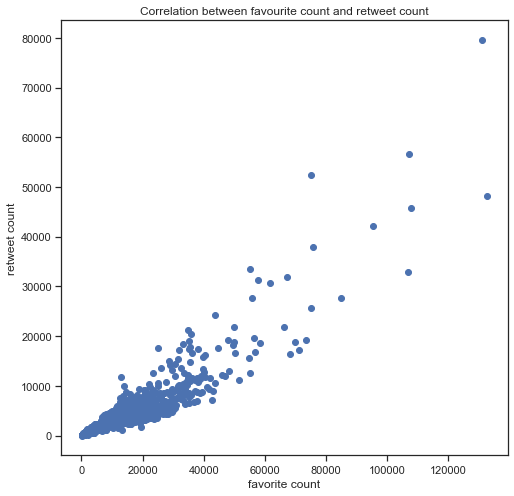

In [90]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)

plt.scatter(x=df_master['favorite_count'],y=df_master['retweet_count'])
plt.xlabel("favorite count")
plt.ylabel("retweet count")
plt.title("Correlation between favourite count and retweet count")
plt.savefig("Correlation between favourite count and retweet count")
plt.show();

In [56]:
df_master['favorite_count'].corr(df_master['retweet_count'])

0.9131748629025431

>Definitely a strong correlation between retweet count and favourite count. This makes sense as, the higher the favourite count of a dog, the more likely it will be retweeted.

#### Distribution of ratings out of 10

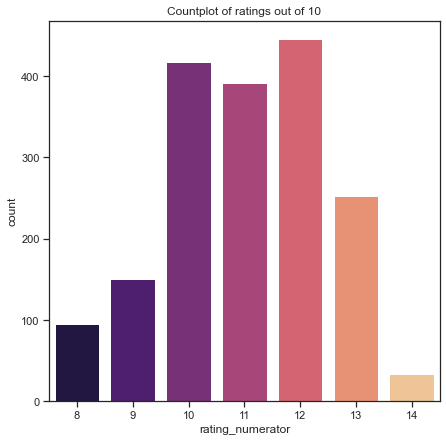

In [91]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style('ticks')
rating =sns.countplot(
        data=df_master,
        x='rating_numerator',
        palette="magma"
)
rating.set_title('Countplot of ratings out of 10')
plt.savefig("Countplot of ratings out of 10")
plt.show();

#### Favorite count of dog stage over time

In [60]:
df_master['month_year'] = df_master['date_of_tweet'].apply(lambda x: x.strftime('%B-%Y')) 

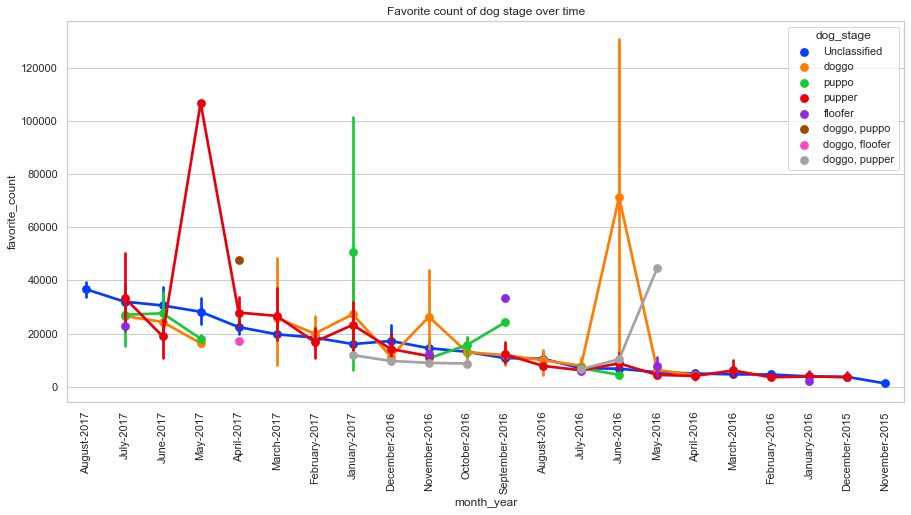

In [92]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_style("whitegrid")
year=sns.pointplot(
    data=df_master,
    x="month_year",
    y="favorite_count",
    hue="dog_stage",
    palette="bright"
)
year.set_title("Favorite count of dog stage over time")
plt.xticks(rotation = 90)
plt.savefig("Favorite count of dog stage over time")
plt.show();

Pupper had a strong peak in may 2017, but has since declined over time. Floofer seems to have gone by the years unnoticed. Doggo on the other hand has risen over the years, with a significant peak in June 2016, but overal has not seen much popularity. Pupper however has been present throughout the time period.